In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc 
import matplotlib.font_manager as fm

for font_path in fm.findSystemFonts(fontpaths = None, fontext = 'ttf'):
    if 'D2Coding' in font_path:
        font = font_manager.FontProperties(fname=font_path).get_name()
        rc('font', family=font)
        break 

In [4]:
DATA_PATH = "./data/titanic/"

df = pd.read_csv(DATA_PATH+"train.csv")
SEED = 42

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [6]:
df.columns = [x.lower() for x in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.tail()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 타겟 데이터 확인

In [8]:
new_survived = pd.Categorical(df["survived"])
new_survived[:5]

[0, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [9]:
new_survived = new_survived.rename_categories(["Died", "Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Survived', 'Survived', 'Survived', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


### 데이터 분리

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('survived', axis=1)
y = df['survived']

X_tr, X_te, y_tr, y_te = train_test_split(X, y, random_state=SEED, test_size=0.2)
X_tr = X_tr.reset_index(drop=True)
X_te = X_te.reset_index(drop=True)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((712, 11), (179, 11), (712,), (179,))

In [12]:
new_survived = pd.Categorical(y_tr)
new_survived = new_survived.rename_categories(["Died", "Survived"])
print(new_survived[:5])
new_survived.describe()

['Died', 'Died', 'Died', 'Died', 'Died']
Categories (2, object): ['Died', 'Survived']


,counts,freqs
categories,,
Died,444,0.623596
Survived,268,0.376404


### Data Cleaning
> 모델이 학습을 할 수 있도록 데이터를 깨끗하게 다듬는 작업

1. 완결성
> 결측값을 가능하면 제거해야 함
2. 유일성
> 중복된 데이터를 가능하면 하나만 남겨야 함
3. 통일성
> 동일한 데이터 형식으로 맞춰야 함

#### 중복 데이터 처리

In [13]:
# 중복제거
# 지금 이 데이터는 중복제거 전과 후가 같으므로 중복된 데이터가 없음을 확인할 수 있음
print(f"before: {df.shape}")
df.drop_duplicates(keep='first', inplace=True, ignore_index=True, )
print(f"after: {df.shape}")

before: (891, 12)
after: (891, 12)


In [14]:
# passengerid에 중복값이 있는지 확인
df['passengerid'].nunique(), df.shape[0]

(891, 891)

모델이 학습을 하기 위해선 Row 전체가 중복된 데이터도 좋지 않지만, 모든 값이 unique한 column도 학습할 수 없기 때문에 없애는 것이 좋다.

In [15]:
# passengerid는 모든 값이 unique하기 때문에 삭제
df.drop('passengerid', axis=1, inplace=True)
print(f"{df.columns}")
df.head()

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 결측치(Missing Value)

> 인지할 수 없는 데이터들

- NaN
- null
- undefined

결측치를 모두 제거할 경우, 막대한 데이터 손실을 일으킬 수 있음   
결측치를 남길 경우, 모델의 학습에 악영향을 미칠 수 있음

##### 결측치 유형 파악

- 완전 무작위 결측
> 
- 무작위 결측
> 
- 비무작위 결측
> 
<br>

ex) 성별(X)에 따라 체중(y)을 예측하기 위해 설문조사로 데이터를 모았다고 하자.   
- 완전 무작위 결측
> 그냥 체중을 응답하지 않은 경우, y가 누락된 이유는 다른 X, y값과는 관련이 없음.
- 무작위 결측
> 여성(X)의 경우 체중에 잘 응답하지 않았던 경우   
> y가 누락된 이유는 성별(X)의 영향임.
- 비무작위 결측
> 체중이 무거운 사람은 자신의 체중을 잘 응답하지 않음.   
> y가 누락된 이유는 y의 값 그 자체의 영향임.

In [16]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  712 non-null    int64  
 1   pclass       712 non-null    int64  
 2   name         712 non-null    object 
 3   sex          712 non-null    object 
 4   age          572 non-null    float64
 5   sibsp        712 non-null    int64  
 6   parch        712 non-null    int64  
 7   ticket       712 non-null    object 
 8   fare         712 non-null    float64
 9   cabin        159 non-null    object 
 10  embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 61.3+ KB


In [17]:
X_tr.isnull().sum().sum(), X_tr.shape[0]

(695, 712)

In [18]:
# 각 컬럼별 결측치의 수
X_tr.isnull().sum().sort_values(ascending=False)

cabin          553
age            140
embarked         2
passengerid      0
pclass           0
name             0
sex              0
sibsp            0
parch            0
ticket           0
fare             0
dtype: int64

In [19]:
# 각 컬럼별 결측치 비율
(X_tr.isnull().sum() / X_tr.shape[0]).round(4).sort_values(ascending=False)

cabin          0.7767
age            0.1966
embarked       0.0028
passengerid    0.0000
pclass         0.0000
name           0.0000
sex            0.0000
sibsp          0.0000
parch          0.0000
ticket         0.0000
fare           0.0000
dtype: float64

findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not 

<AxesSubplot: >

findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not 

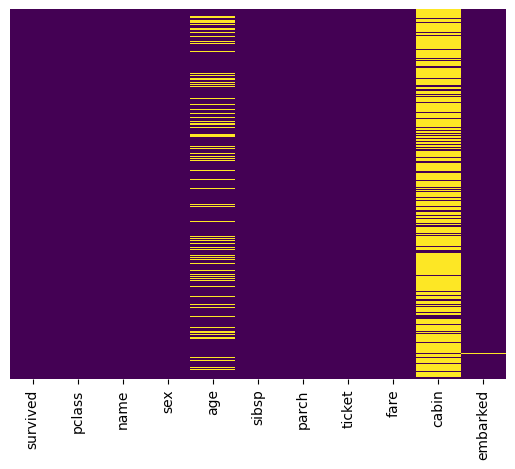

In [20]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Total Missing Value (%)')

findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not 

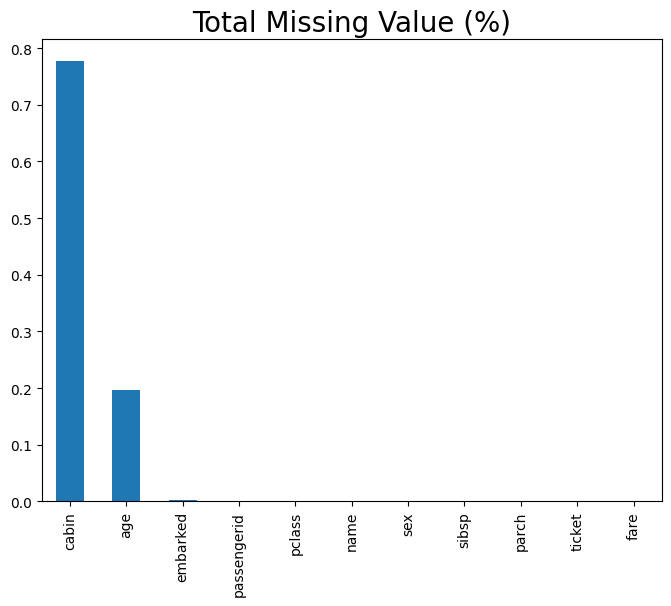

In [21]:
total = X_tr.isnull().sum().sort_values(ascending=False)
percent = (X_tr.isnull().sum() / X_tr.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
percent_data = percent.head(20)
percent_data.plot(kind="bar", figsize=(8, 6), fontsize=10)

plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.title("Total Missing Value (%)", fontsize=20)

In [22]:
X_tr['hasCabin'] = X_tr['cabin'].isnull().apply(lambda x: 0 if x == True else 1)
X_tr['hasAge'] = X_tr['age'].isnull().apply(lambda x: 0 if x == True else 1)

findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not 

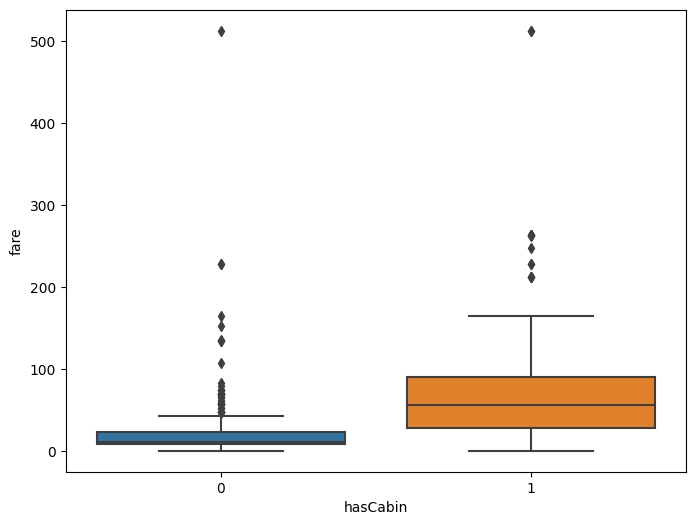

In [23]:
data = pd.concat([X_tr['fare'], X_tr['hasCabin']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='hasCabin', y='fare', data=data)

findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not 

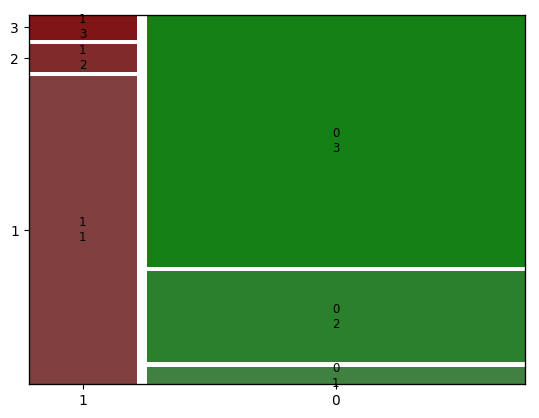

In [24]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(X_tr, ['hasCabin', 'pclass'], gap=0.02)
plt.show()

findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not 

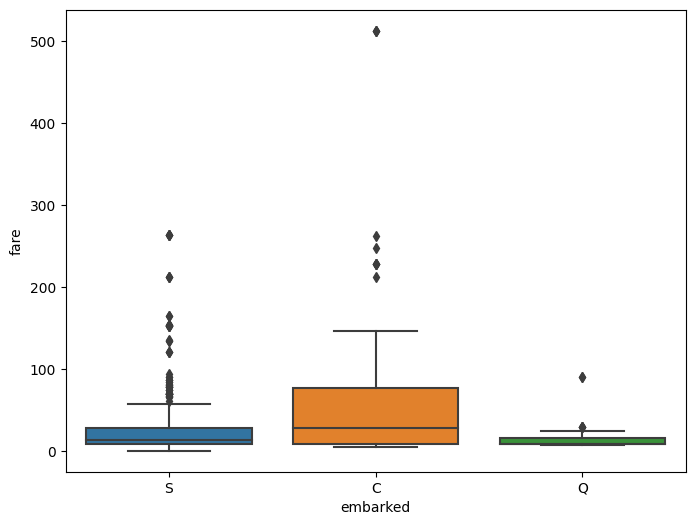

In [26]:
data = pd.concat([X_tr['fare'], X_tr['embarked']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='embarked', y="fare", data=data)

<AxesSubplot: xlabel='embarked', ylabel='fare'>

findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not found.
findfont: Font family 'D2Coding ligature' not 

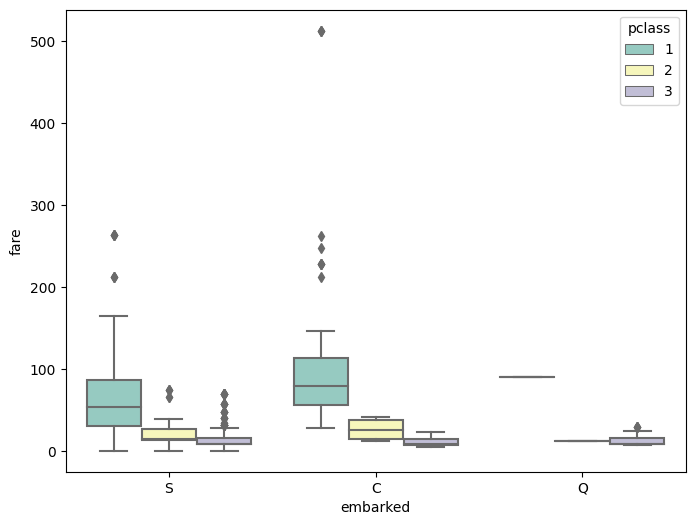

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="embarked", y="fare", hue="pclass",
            data=X_tr, palette="Set3")